In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data=pd.read_csv(mouse_drug_data_to_load)
clinical_data=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_drugs=pd.merge(mouse_data, clinical_data, on=["Mouse ID"])

# Display the data table for preview
mouse_drugs.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [15]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_means=mouse_drugs.groupby(["Drug","Timepoint"]).mean()

tumor_volume_means=tumor_volume_means.drop(columns=["Metastatic Sites"])
# Preview DataFrame
tumor_volume_means.head()



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [73]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_errors=mouse_drugs.groupby(["Timepoint","Drug"]).sem()

tumor_volume_errors=tumor_volume_errors.drop(columns=["Metastatic Sites", "Mouse ID"])

tumor_volume_errors=tumor_volume_errors.unstack()
# Preview DataFrame
tumor_volume_errors


Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   
25                  0.881642  0.439356  0.550315  0.755413  0.813706   
30                  0.934460  0.490620  0.631061  0.934121  0.975496   
35                  1.052241  0.692248  0.984155  1.127867  1.013769   
40                  1.223608  0.708505  1.055220  1.158449  1.118567   
45                  1.223977  0.902358  1.144427  1.453186  1.416363   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182  
25         1.034872  0.577401  0.746991  0.741922  0.602513  
30         1.218231  0.746045  0.864906  0.899548  0.800043  
35         1.287481  1.084929  0.967433  1.003186  0.881426  
40         1.370634  1.564779  1.128445  1.410435  0.998515  
45         1.351726  1.888586  1.226805  1.576556  1.003576

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [39]:
# Minor Data Munging to Re-Format the Data Frames
this=mouse_drugs.groupby(["Timepoint", "Drug"]).mean()
this=this.drop(columns=["Metastatic Sites"])
this=this.unstack()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


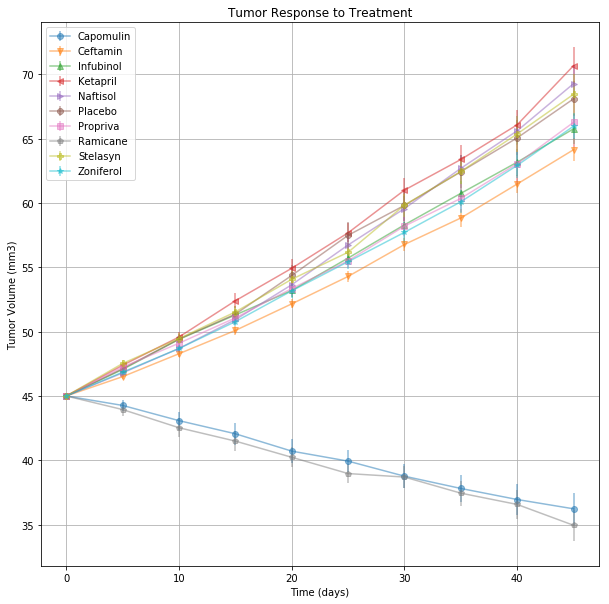

In [121]:

fig, ax = plt.subplots(figsize=(10,10))

drugs=["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]

markers=["o","v","^","<",">","8","s","p","P","*"]


times=[0,5,10,15,20,25,30,35,40,45]

number=0
for drug in drugs:
    volume=this["Tumor Volume (mm3)"][drug]
    errors=tumor_volume_errors["Tumor Volume (mm3)"][drug]
    ax.errorbar(x=times, y=volume, yerr=errors, alpha=0.5, marker=markers[number])
    number=number+1

plt.legend(drugs)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (days)")
plt.title("Tumor Response to Treatment")
plt.grid(True)
plt.rc('font', size=10)
plt.rc('figure', titlesize=30)


0        0
1        5
2       10
3       15
4       20
5       25
6       30
7       35
8        0
9        5
10      10
11      15
12      20
13      25
14      30
15      35
16      40
17      45
18       0
19       5
20      10
21      15
22      20
23      25
24      30
25      35
26      40
27      45
28       0
29       5
        ..
1876    25
1877     0
1878     5
1879    10
1880    15
1881     0
1882     5
1883    10
1884    15
1885    20
1886    25
1887    30
1888    35
1889    40
1890    45
1891     0
1892     5
1893    10
1894    15
1895    20
1896    25
1897    30
1898    35
1899    40
1900    45
1901     0
1902     5
1903    10
1904    15
1905    20
Name: Timepoint, Length: 1906, dtype: int64

In [90]:
tumor_volume_errors["Tumor Volume (mm3)"]["Capomulin"]

Timepoint
0     0.000000
5     0.448593
10    0.702684
15    0.838617
20    0.909731
25    0.881642
30    0.934460
35    1.052241
40    1.223608
45    1.223977
Name: Capomulin, dtype: float64

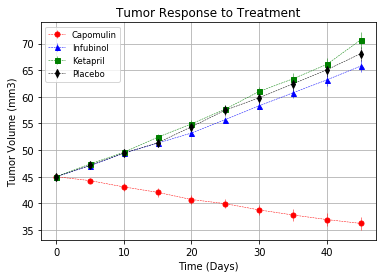

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


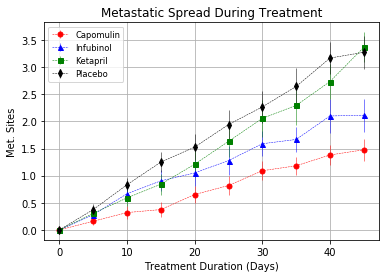

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

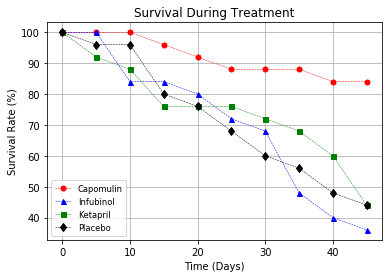

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

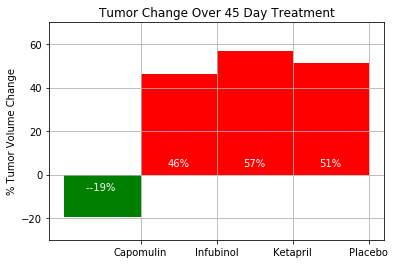